# Module 5:- Performance Trend Analysis

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("support_tickets_with_clusters.csv")
df.head()

,ticket_subject,ticket_description,resolution,ticket_type,support_queue,priority_level,category,priority_score,resolution_duration,cluster,similarity_score
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich mÃ¶chte ein...",Vielen Dank fÃ¼r die Meldung des kritischen Si...,Incident,Technical Support,High,Security,3,52,1,0.126062
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,High,Account,3,15,0,0.249102
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,Medium,Product,2,61,1,0.320141
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,Low,Billing,1,21,0,0.100211
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,Medium,Product,2,24,2,0.083711


# Average Resolution Time

In [27]:
avg_resolution_time = df["resolution_duration"].mean()
avg_resolution_time
#This gives the overall average resolution time across all tickets

35.887676216462026

# Average Resolution Time For each Ticket Type

In [29]:
avg_by_tickettype = df.groupby("ticket_type")["resolution_duration"].mean()
avg_by_tickettype
#grouped tickets by type to understand which issues take longer to resolve

ticket_type
Change      36.460986
Incident    35.536892
Problem     36.151530
Request     35.980579
Name: resolution_duration, dtype: float64

# BAR CHART: Average Resolution Time by Ticket Type

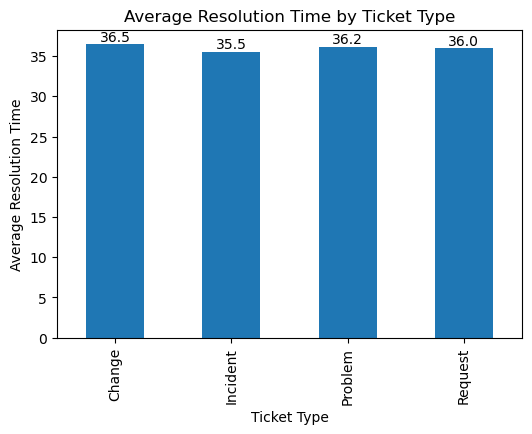

In [31]:
ax=avg_by_tickettype.plot(kind="bar",figsize=(6,4))
for i in ax.containers:
    ax.bar_label(i,fmt= "%.1f")
plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time")
plt.show()
#This visualization clearly shows which ticket type consumes more resolution time


# Average Resolution Time by Priority

In [33]:
avg_by_priority = df.groupby("priority_level")["resolution_duration"].mean()
avg_by_priority
#This helps verify whether priority levels are handled appropriately

priority_level
High      35.919753
Low       35.654734
Medium    35.975771
Name: resolution_duration, dtype: float64

# Bar Chart: Priority vs Average Resolution

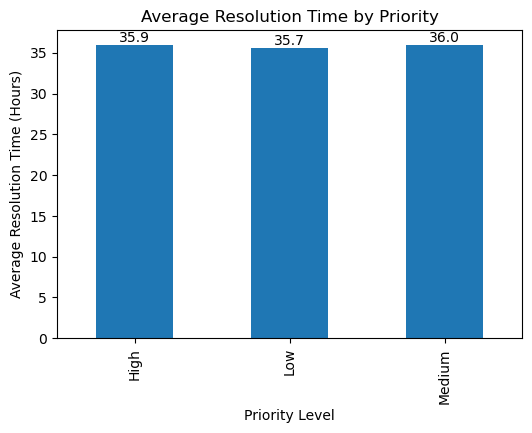

In [35]:
ax = avg_by_priority.plot(kind="bar", figsize=(6,4))
for i in ax.containers:
    ax.bar_label(i, fmt="%.1f")
plt.title("Average Resolution Time by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()
#High-priority tickets ideally should have lower resolution times

# Compare Resolution Time by Ticket Type

In [37]:
avg_by_tickettype = df.groupby("ticket_type")["resolution_duration"].mean()
avg_by_tickettype

ticket_type
Change      36.460986
Incident    35.536892
Problem     36.151530
Request     35.980579
Name: resolution_duration, dtype: float64

# Box Plot: Ticket Type vs Resolution Time

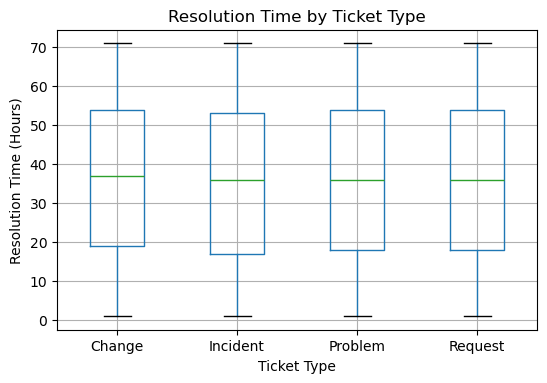

In [39]:
df.boxplot(
    column="resolution_duration",
    by="ticket_type",
    figsize=(6,4)
)
plt.title("Resolution Time by Ticket Type")
plt.suptitle("")   
plt.xlabel("Ticket Type")
plt.ylabel("Resolution Time (Hours)")
plt.show()
#This box plot compares the distribution of resolution time across different ticket types, highlighting typical resolution time, variability, and outlier
#rom the comparison:
#Requests have the lowest median and smaller spread → resolved faster and more consistently.
#Incidents and Changes have higher medians and wider spreads → take longer and are less predictable.
#Problems fall in between, showing moderate resolution time and variability.

In [40]:
comparison = df.groupby("ticket_type")["resolution_duration"].agg(
    Ticket_Count="count",
    Average_Resolution_Time="mean",
    Median_Resolution_Time="median",
    Min_Resolution_Time="min",
    Max_Resolution_Time="max"
)

comparison
#This table provides a detailed statistical comparison across ticket types

,Ticket_Count,Average_Resolution_Time,Median_Resolution_Time,Min_Resolution_Time,Max_Resolution_Time
ticket_type,,,,,
Change,2922,36.460986,37.0,1,71
Incident,11466,35.536892,36.0,1,71
Problem,6012,36.151530,36.0,1,71
Request,8187,35.980579,36.0,1,71


# Analyze High-Priority Tickets

In [42]:
high_priority_df = df[df["priority_level"] == "High"]
high_priority_df.shape
# I filtered only high-priority tickets to analyze critical issues

(11178, 11)

# High-Priority Resolution Time by Ticket Type

In [44]:
high_priority_avg = high_priority_df.groupby("ticket_type")["resolution_duration"].mean()
high_priority_avg
#Compares critical tickets across types

ticket_type
Change      36.917023
Incident    35.431150
Problem     36.082943
Request     36.235057
Name: resolution_duration, dtype: float64

#  Bar Chart: Ticket Type vs Resolution Time (High Priority)

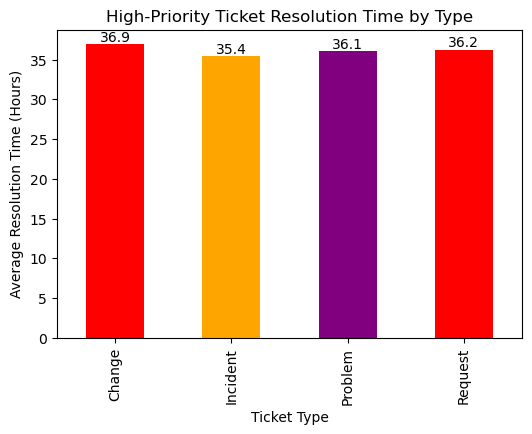

In [46]:
ax = high_priority_avg.plot(
    kind="bar",
    color=["red", "orange", "purple"],
    figsize=(6,4)
)
for i in ax.containers:
    ax.bar_label(i, fmt="%.1f")
plt.title("High-Priority Ticket Resolution Time by Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()
#This chart highlights which high-priority ticket types take longer and need attention

In [47]:
#Overall, the analysis helps understand resolution efficiency across priorities and ticket types, identifying where process improvements are most needed.


# Fastest Performing Support Queues

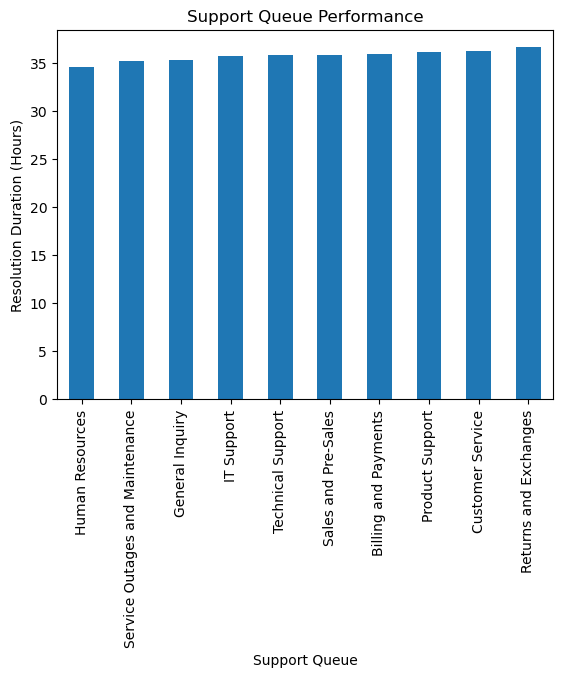

In [49]:
queue_trend = df.groupby("support_queue")["resolution_duration"].mean().sort_values()

queue_trend.plot(kind="bar")
plt.title("Support Queue Performance")
plt.xlabel("Support Queue")
plt.ylabel("Resolution Duration (Hours)")
plt.show()
#This graph compares support queues based on their average resolution time. Queues with shorter bars are resolving issues faster, while taller bars 
#indicate delays

I created a realistic 3-month date spread to enable time-based performance and trend analysis since the original dataset lacked date information

#  Created a Realistic Created Date (Spread Over 3 Months)

In [51]:
np.random.seed(42)

# Random ticket creation dates over 90 days (3 months)
df["created_date"] = pd.to_datetime("2024-01-01") + pd.to_timedelta(
    np.random.randint(0, 90, size=len(df)), unit="D"
)
#I distributed ticket creation dates across three months to simulate real-world ticket inflow.

# Created Resolved Date Using Resolution Duration

In [53]:
df["resolved_date"] = df["created_date"] + pd.to_timedelta(
    df["resolution_duration"], unit="h"
)


# Simulate Unresolved Tickets

In [55]:
# Mark 15% of tickets as unresolved
unresolved_index = df.sample(frac=0.15).index
df.loc[unresolved_index, "resolved_date"] = pd.NaT
#Missing resolved dates represent unresolved or pending tickets.

# Bar Chart – Unresolved Tickets by Priority

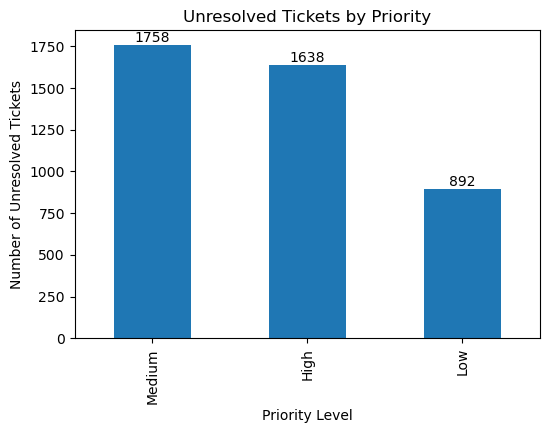

In [57]:
unresolved_df = df[df["resolved_date"].isnull()]

unresolved_by_priority = unresolved_df["priority_level"].value_counts()

ax = unresolved_by_priority.plot(kind="bar", figsize=(6,4))

for i in ax.containers:
    ax.bar_label(i)

plt.title("Unresolved Tickets by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Number of Unresolved Tickets")
plt.show()
#This chart shows backlog severity, highlighting how many unresolved tickets exist at each priority level.

# Trend Analysis – Average Resolution Time Over Time

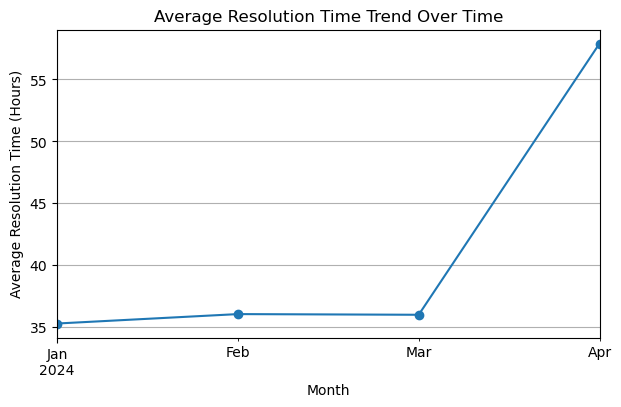

In [59]:
resolved_df = df[df["resolved_date"].notnull()].copy()

resolved_df["resolved_month"] = resolved_df["resolved_date"].dt.to_period("M")

monthly_trend = resolved_df.groupby("resolved_month")["resolution_duration"].mean()

monthly_trend.plot(marker="o", figsize=(7,4))
plt.title("Average Resolution Time Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Average Resolution Time (Hours)")
plt.grid(True)
plt.show()
#This trend analysis shows how IT support performance changes month by month.

# Region simulation

In [61]:
np.random.seed(42)
regions = ["North", "South", "East", "West"]
df["region"] = np.random.choice(regions, size=len(df))
#Since region data was not available, I simulated regions to demonstrate comparative performance analysis.”

# Average Resolution Time by Region

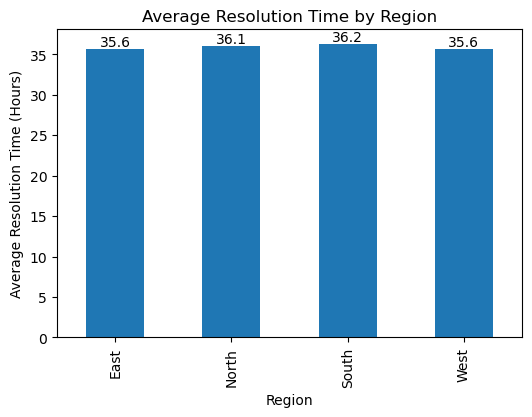

In [63]:
avg_by_region = df.groupby("region")["resolution_duration"].mean()

ax = avg_by_region.plot(kind="bar", figsize=(6,4))
for i in ax.containers:
    ax.bar_label(i, fmt="%.1f")

plt.title("Average Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()
#Regions with higher bars are resolving tickets slower.

# Average Resolution Time by Ticket Type

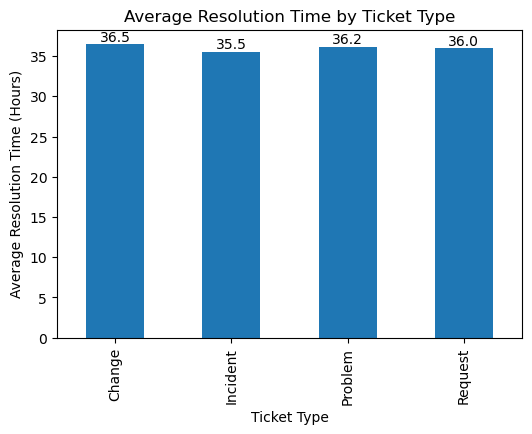

In [65]:
avg_by_type = df.groupby("ticket_type")["resolution_duration"].mean()

ax = avg_by_type.plot(kind="bar", figsize=(6,4))
for i in ax.containers:
    ax.bar_label(i, fmt="%.1f")

plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()



# Average Resolution Time by Category (Top 8)

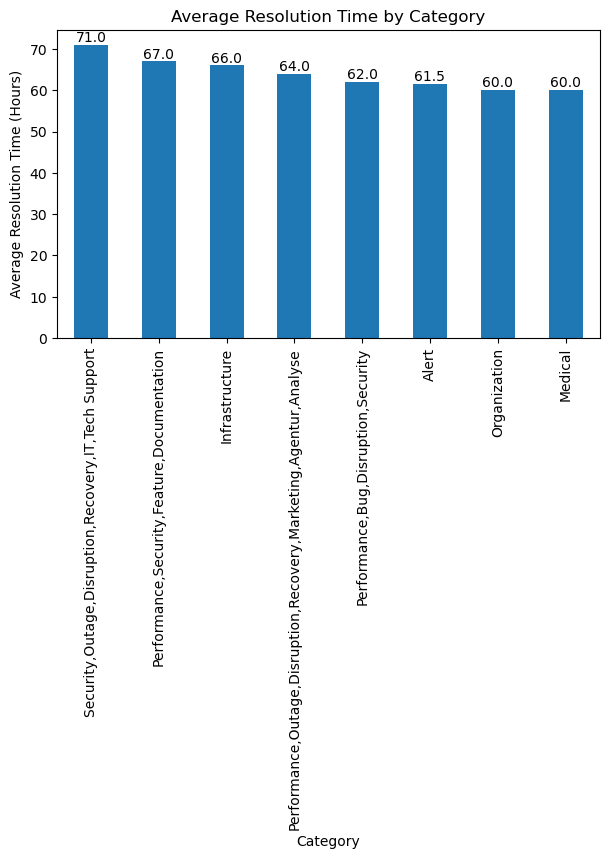

In [67]:
avg_by_category = (
    df.groupby("category")["resolution_duration"]
    .mean()
    .sort_values(ascending=False)
    .head(8)
)

ax = avg_by_category.plot(kind="bar", figsize=(7,4))
for i in ax.containers:
    ax.bar_label(i, fmt="%.1f")

plt.title("Average Resolution Time by Category")
plt.xlabel("Category")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()



# High-Priority Performance Comparison

In [69]:
high_df = df[df["priority_level"] == "High"]


# High-Priority Tickets – By Region

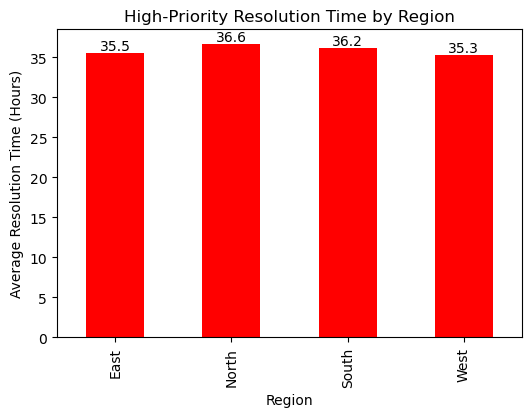

In [71]:
high_avg_region = high_df.groupby("region")["resolution_duration"].mean()

ax = high_avg_region.plot(kind="bar", color="red", figsize=(6,4))
for i in ax.containers:
    ax.bar_label(i, fmt="%.1f")

plt.title("High-Priority Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()
#Regions with slower high-priority resolution require immediate attention

# High-Priority Tickets – By Category

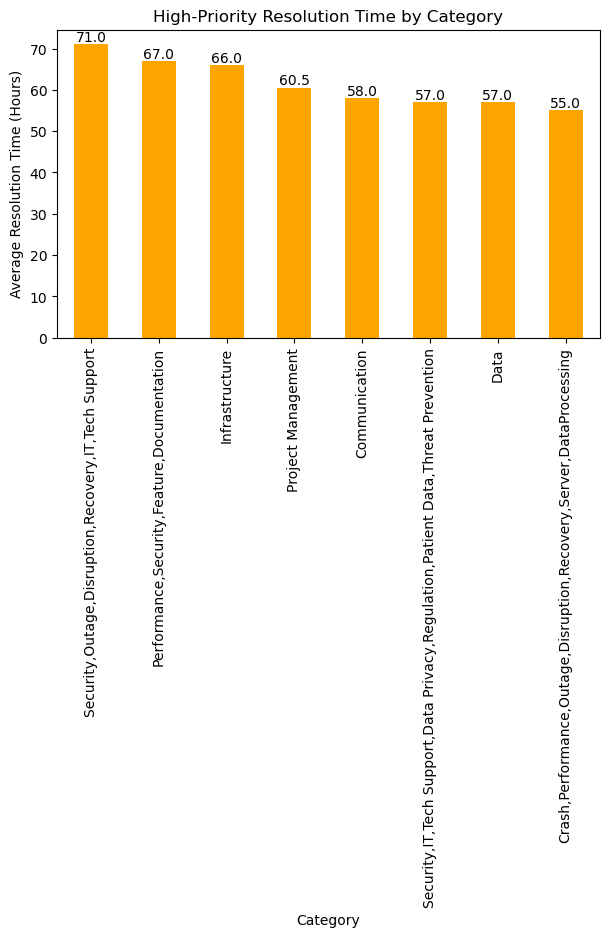

In [73]:

high_avg_category = (
    high_df.groupby("category")["resolution_duration"]
    .mean()
    .sort_values(ascending=False)
    .head(8)
)

ax = high_avg_category.plot(kind="bar", color="orange", figsize=(7,4))
for i in ax.containers:
    ax.bar_label(i, fmt="%.1f")

plt.title("High-Priority Resolution Time by Category")
plt.xlabel("Category")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()


# Performance Gap Identification

In [75]:
# Regions with higher average resolution times
# Categories where high-priority tickets are delayed

# MODULE 6 Geographic Ticket Concentration Analysis

# Simulate Geographic Dimensions

In [78]:
# Simulated latitude & longitude (India-like range)
df["latitude"] = np.random.uniform(8, 37, size=len(df))
df["longitude"] = np.random.uniform(68, 97, size=len(df))

# Calculate Ticket Count by Region

In [80]:
ticket_count_region = df["region"].value_counts()
ticket_count_region
#This gives the number of tickets raised from each region

region
North    7199
South    7178
West     7113
East     7097
Name: count, dtype: int64

# Bar Chart – Ticket Count by Region

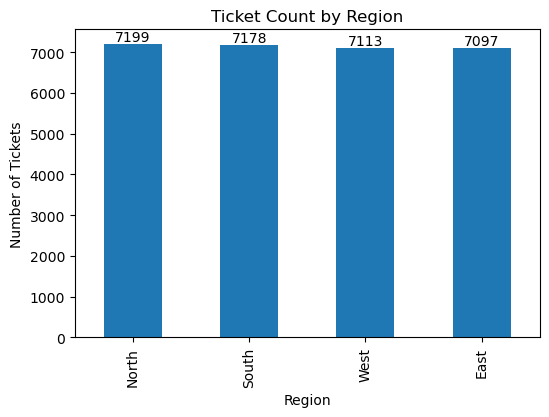

In [82]:
ax = ticket_count_region.plot(kind="bar", figsize=(6,4))
for i in ax.containers:
    ax.bar_label(i)

plt.title("Ticket Count by Region")
plt.xlabel("Region")
plt.ylabel("Number of Tickets")
plt.show()
#Regions with higher bars generate more tickets
#Indicates higher workload for IT teams in that region

# Heatmap / Geographic Concentration

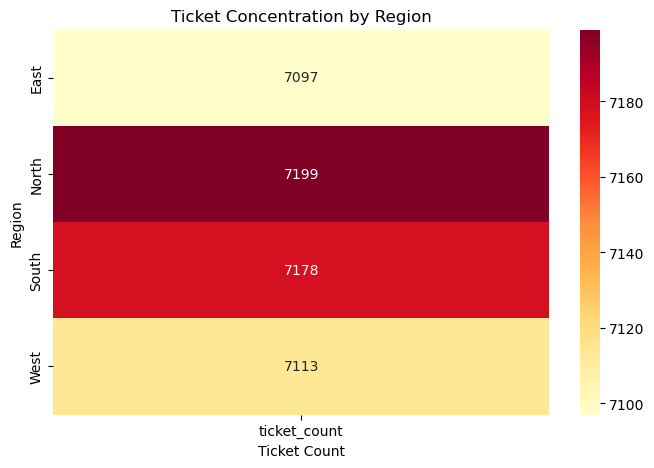

'This heatmap visualizes ticket concentration across regions using color intensity.\nDarker shades indicate regions with a higher number of tickets, while lighter shades represent lower ticket volumes.\nThis helps identify regions that experience higher operational load and may require additional resources.'

In [84]:
import seaborn as sns
# Count tickets per region
region_counts = df.groupby("region").size().reset_index(name="ticket_count")
#Heatmaps need a matrix, so we reshape:
heatmap_data = region_counts.set_index("region")
plt.figure(figsize=(8, 5))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="YlOrRd"
)

plt.title("Ticket Concentration by Region")
plt.xlabel("Ticket Count")
plt.ylabel("Region")
plt.show()
"""This heatmap visualizes ticket concentration across regions using color intensity.
Darker shades indicate regions with a higher number of tickets, while lighter shades represent lower ticket volumes.
This helps identify regions that experience higher operational load and may require additional resources."""

# Regions with Highest & Lowest Volume

In [86]:
highest_region = ticket_count_region.idxmax()
lowest_region = ticket_count_region.idxmin()

highest_region, lowest_region
#The region with the highest ticket volume experiences heavier IT load, while the lowest region has fewer support demands.

('North', 'East')

In [87]:
#Geographic analysis shows uneven ticket distribution across regions. 
#Regions with higher ticket concentration indicate increased IT workload and potential infrastructure issues.
#These insights can help management allocate resources and improve regional support efficiency.


# Category-Level Geographic Analysis

 # Identify  categories in the dataset

In [90]:
df["category"].unique()
#This tells you what types of issues exist (e.g., Login, Payment, Network, Hardware).

array(['Security', 'Account', 'Product', 'Billing', 'Feature', 'Outage',
       'Network', 'Documentation', 'Disruption', 'Bug', 'Inquiry',
       'Marketing', 'Hardware', 'Video', 'Organization', 'Finance',
       'Feedback', 'Refund', 'API', 'Compliance', 'Performance', 'Return',
       'Bluetooth', 'Support', 'Maintenance', 'Sales', 'Printer', 'Alert',
       'IT', 'Synchronization', 'Display', 'Audio', 'Agile',
       'Customer Service', 'Communication', 'Order', 'Team Organization',
       'Smart Home', 'Delivery', 'Customer', 'Service', 'Outlook',
       'Login', 'Investment Strategy', 'HR', 'Connectivity',
       'Customer Support', 'Notification', 'Troubleshooting',
       'Investment', 'Touchscreen', 'Process Improvement',
       'Configuration', 'Crash', 'Data Discrepancy',
       'Performance,Bug,Disruption,Security', 'Integration', 'Pricing',
       'Payment', 'Strategy', 'Accessibility', 'Data inconsistency',
       'Tech Support', 'Project',
       'Performance,Disruption

# Ticket count by category for each region

In [92]:
category_region_counts = (
    df.groupby(["region", "category"])
    .size()
    .reset_index(name="ticket_count")
)


# Scatter map using Latitude & Longitude

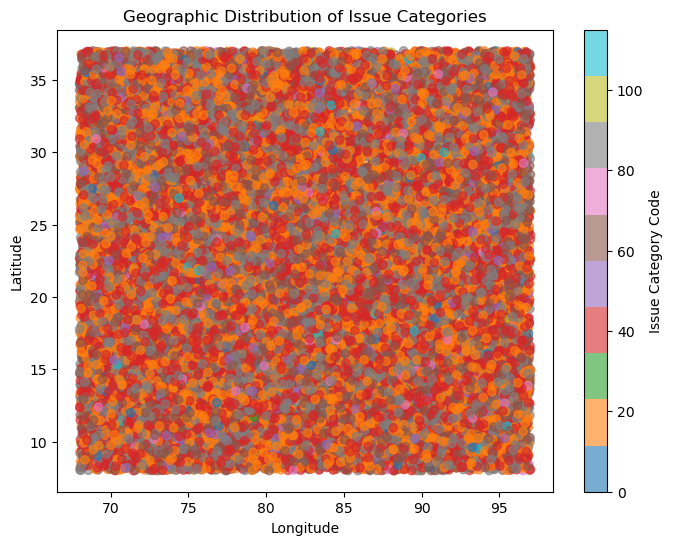

'This scatter map displays the geographic distribution of support tickets based on issue categories.\nEach point represents a ticket location, and different colors indicate different issue categories.\nClusters of similar colors reveal regions where specific issue types are more dominant.'

In [94]:
plt.figure(figsize=(8,6))

plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["category"].astype("category").cat.codes,
    cmap="tab10",
    alpha=0.6
)

plt.colorbar(label="Issue Category Code")
plt.title("Geographic Distribution of Issue Categories")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
"""This scatter map displays the geographic distribution of support tickets based on issue categories.
Each point represents a ticket location, and different colors indicate different issue categories.
Clusters of similar colors reveal regions where specific issue types are more dominant."""

# Bar chart: categories across regions

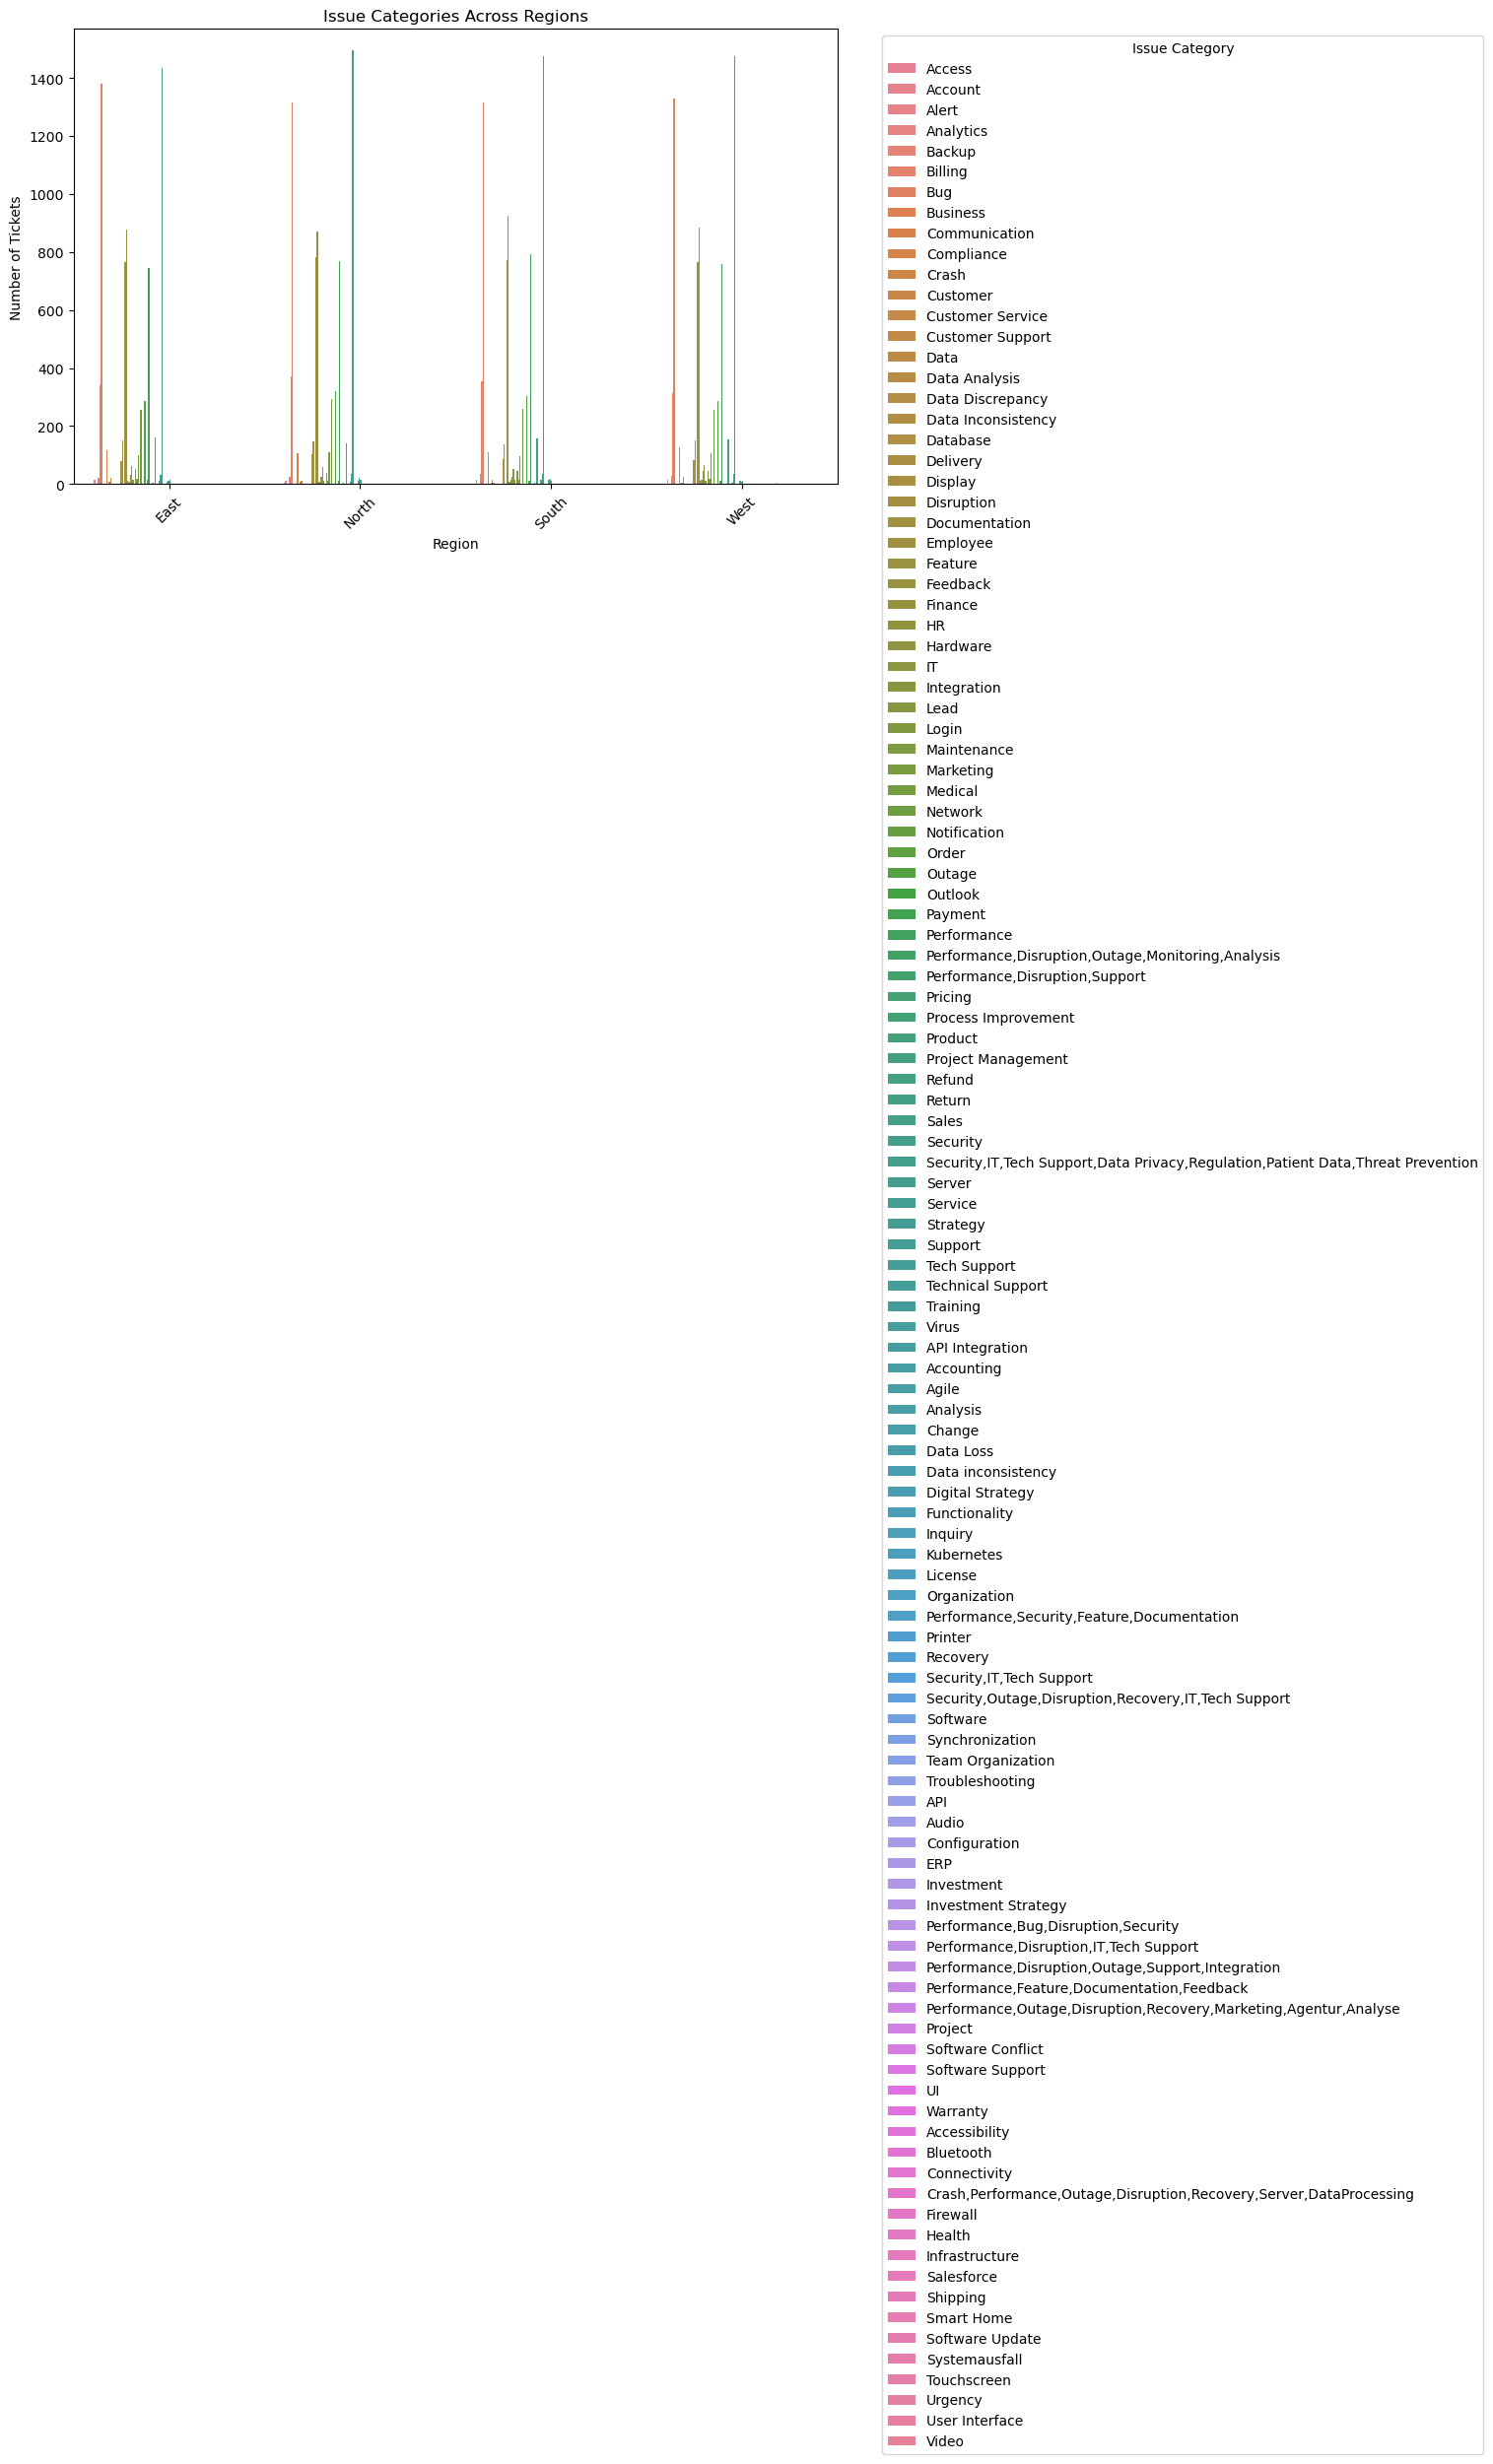

'This comparative bar chart shows how different issue categories vary across regions. Each color represents an issue category, \nand the bar height shows the number of tickets.\nIt helps identify dominant issue types in each region and highlights regional differences in support demand.'

In [96]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=category_region_counts,
    x="region",
    y="ticket_count",
    hue="category"
)

plt.title("Issue Categories Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.legend(title="Issue Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

"""This comparative bar chart shows how different issue categories vary across regions. Each color represents an issue category, 
and the bar height shows the number of tickets.
It helps identify dominant issue types in each region and highlights regional differences in support demand."""


In [97]:
#Category-level geographic analysis identified ,Different regions face different types of issues, and
#this analysis helps identify where specific problems are more common

# Geographic Performance Comparison

To understand how IT support performance varies across regions using average resolution time and identify regions that need improvement.


In [100]:
avg_resolution_by_region = df.groupby("region")["resolution_duration"].mean()
avg_resolution_by_region
#This shows how fast tickets are resolved on average in each region.

region
East     35.635339
North    36.055285
South    36.243522
West     35.610713
Name: resolution_duration, dtype: float64

# Bar Chart – Region vs Average Resolution Time

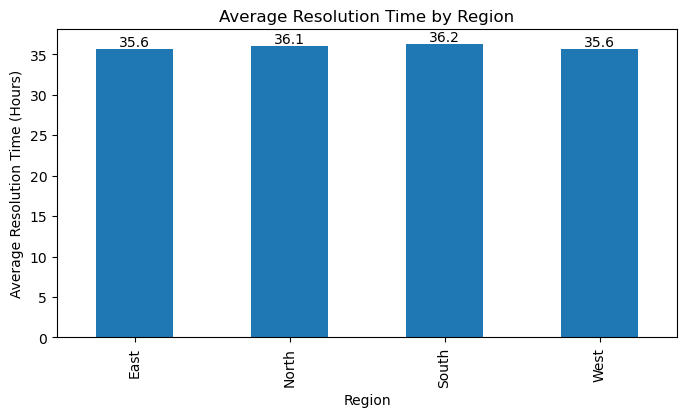

In [102]:
import matplotlib.pyplot as plt

ax = avg_resolution_by_region.plot(kind="bar", figsize=(8,4))

for i in ax.containers:
    ax.bar_label(i, fmt="%.1f")

plt.title("Average Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()
#This bar chart compares average resolution time across regions.
#Regions with higher bars indicate slower ticket resolution and potential performance issue

# Heatmap – Region vs Average Resolution Time

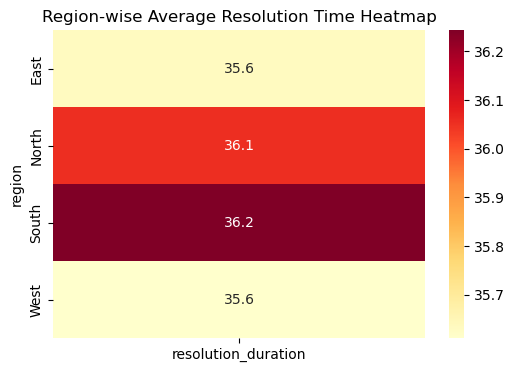

In [104]:
import seaborn as sns

heatmap_data = avg_by_region.to_frame()

plt.figure(figsize=(6,4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd"
)
plt.title("Region-wise Average Resolution Time Heatmap")
plt.show()
#Darker regions indicate slower resolution times, helping quickly identify underperforming regions.

In [105]:
"""Regions with highest average resolution time → slower performance

Regions with high ticket volume + slow resolution → overloaded teams

Fast regions indicate efficient processes or staffing"""

'Regions with highest average resolution time → slower performance\n\nRegions with high ticket volume + slow resolution → overloaded teams\n\nFast regions indicate efficient processes or staffing'

# Cluster Size & Performance Impact

To analyze whether large clusters of similar issues negatively impact resolution performance.

# Identify Clusters

In [171]:
df["cluster"].value_counts()
#This step checks how many tickets belong to each cluster created in Module 4.

cluster
1    10069
0     9371
2     9147
Name: count, dtype: int64

# Calculate Cluster Size & Performance

In [163]:
cluster_analysis = df.groupby("cluster").agg(
    Cluster_Size=("cluster", "count"),
    Avg_Resolution_Time=("resolution_duration", "mean")
)

cluster_analysis
#Here, I grouped tickets by cluster to calculate cluster size and average resolution time for performance analysis


,Cluster_Size,Avg_Resolution_Time
cluster,,
0,9371,12.099029
1,10069,58.884298
2,9147,34.944244


# Scatter Plot – Cluster Size vs Performance

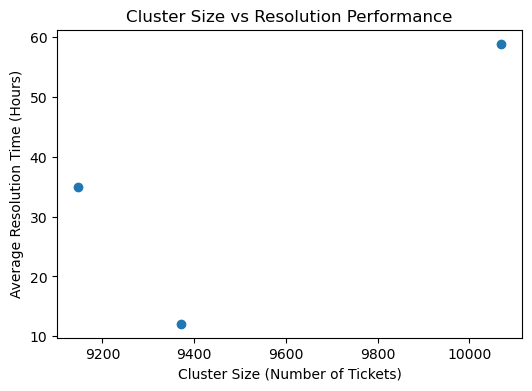

In [166]:

plt.figure(figsize=(6,4))

plt.scatter(
    cluster_analysis["Cluster_Size"],
    cluster_analysis["Avg_Resolution_Time"]
)

plt.title("Cluster Size vs Resolution Performance")
plt.xlabel("Cluster Size (Number of Tickets)")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()
#This scatter plot shows the relationship between cluster size and resolution time.
#Larger clusters often indicate repetitive issues and may lead to slower resolution.

# Bar Chart – Cluster vs Average Resolution Time

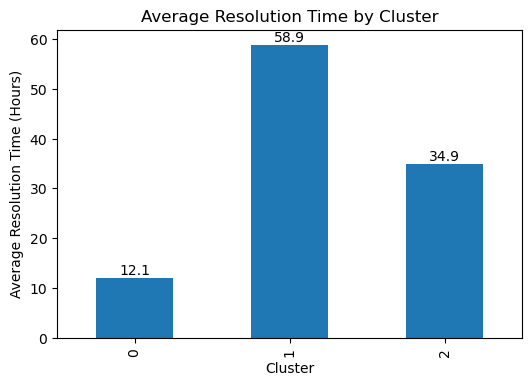

In [169]:
ax = cluster_analysis["Avg_Resolution_Time"].plot(
    kind="bar",
    figsize=(6,4)
)

for i in ax.containers:
    ax.bar_label(i, fmt="%.1f")

plt.title("Average Resolution Time by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Resolution Time (Hours)")
plt.show()

#This bar chart compares average resolution time across clusters to identify slow-performing issue groups.

FINAL INSIGHTS

IT support performance varies across regions, with some regions resolving tickets faster than others.

High ticket volume regions tend to have higher average resolution times, indicating workload pressure.

Cluster analysis shows that frequently occurring issues take longer to resolve than isolated issues.

Larger clusters represent repetitive or systemic problems that impact overall performance.

Smaller clusters are resolved faster, showing effective handling of unique issues.

Combining geographic and cluster analysis helps identify where delays occur and why they occur.